### Import all necesary libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


## Import all necessary resources

In [18]:
img1 = cv2.imread('/home/yogesh/Desktop/CS/cloudArchitecture/resources/flam_cards/0.jpg') # queryImage
img2 = cv2.imread('/home/yogesh/Desktop/CS/cloudArchitecture/resources/flam_cards/0.jpg') # trainImage

# img1_SIFT = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2_SIFT =cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


img1_SIFT = img1
img2_SIFT = img2


### Show Query Image

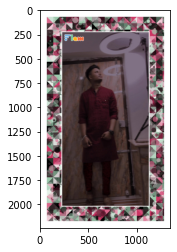

In [19]:
img_test = img1

img_test = cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB)
plt.imshow(img_test)

### Initialize the keyoint extractor

In [20]:
orb = cv2.ORB_create()
sift = cv2.SIFT_create()

### Computing keypoints 

In [21]:
kp1_orb, des1_orb = orb.detectAndCompute(img1,None)
kp2_orb, des2_orb = orb.detectAndCompute(img2,None)

In [22]:
kp1_SIFT, des1_SIFT = sift.detectAndCompute(img1_SIFT,None)
kp2_SIFT, des2_SIFT = sift.detectAndCompute(img2_SIFT,None)

### Initilizing the matcher (Brute Force Mtcher)

In [23]:
bf = cv2.BFMatcher()
FLANN_matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)

## Matching  images

####  Select Algoritm and matcher

In [24]:
matching_methods = ["BF_matcher","FLANN_matcher"]

In [25]:
feature_extractions = ["ORB", "SIFT"]
feature_detection = [[des1_orb,des2_orb],[des1_SIFT,des2_SIFT]]
feature_keypoints = [[kp1_orb,kp2_orb],[kp1_SIFT,kp2_SIFT]]

In [26]:
matcher_selection = int(input())

0


In [27]:
feature_selection = int(input())

0


In [28]:
print(matching_methods[matcher_selection])
print(feature_extractions[feature_selection])

BF_matcher
ORB


### Matching Start

In [29]:
matches = None

if(matcher_selection ==0):
    matches = bf.knnMatch(feature_detection[feature_selection][0],feature_detection[feature_selection][1], k=2)
    
elif(matcher_selection == 1):
    matches = FLANN_matcher.knnMatch(feature_detection[feature_selection][0],feature_detection[feature_selection][1], 2)

In [30]:
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
print(len(good))

500


### Draw Matches

In [32]:
imgFeatures = cv2.drawMatches(img1,feature_keypoints[feature_selection][0] , img2, feature_keypoints[feature_selection][1], good, None, flags=2)

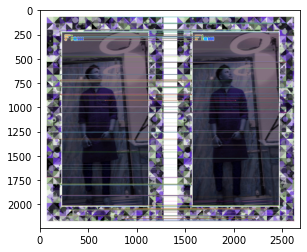

In [33]:
plt.imshow(imgFeatures)